In [1]:
import diffxpy.api as de
print("diffpy version "+de.__version__)
import scanpy as sc
import numpy as np
import pandas as pd

/home/ghartoularos/anaconda3/envs/xyzeq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/ghartoularos/anaconda3/envs/xyzeq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/ghartoularos/anaconda3/envs/xyzeq/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/ghartoularos/anaconda3/en

diffpy version v0.6.13


In [2]:
import scanpy as sc

adata=sc.read_loom('/data/xyzeq/xyzeq/individual.raw.and.proc.h5ads/data_for_figure.loom')

In [6]:
sc.__version__

In [3]:
adata_new = adata[~adata.obs['Percent_Tumor_1'].isnull()]

adata_new.obs['time'] = adata_new.obs['Percent_Tumor_1']

# Alternatively, you can use your proximity score

# adata_new = adata[~adata.obs['prox_2'].isnull()]
#adata_new.obs['time'] = adata_new.obs['prox_2']


Trying to set attribute `.obs` of view, making a copy.


In [4]:
det = de.test.continuous_1d(
    data=adata_new.X,
    sample_description=adata_new.obs,
    gene_names=adata_new.var_names,
    formula_loc="~ 1 + time",
    formula_scale="~ 1",
    factor_loc_totest="time",
    continuous="time",
    size_factors=np.random.uniform(0.2, 2, adata_new.n_obs),
    df=4,
    quick_scale=False
)
det.summary().iloc[:5, :]

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Step: 0 loss: 1308.309191 models converged 0
INFO:tensorflow:Step: 1 loss: 1302.660836, converged 0 in 1.288 sec., updated 2421, {f: 0, g: 0, x: 0}
INFO:tensorflow:Step: 2 loss: 1301.996422, converged 0 in 0.852 sec., updated 2409, {f: 0, g: 0, x: 0}
INFO:tensorflow:Step: 3 loss: 1301.711028, converged 0 in 0.845 sec., updated 2403, {f: 0, g: 0, x: 0}
INFO:tensorflow:Step: 4 loss: 1301.524590, converged 0 in 0.849 sec., updated 2401, {f: 0, g: 0, x: 0}
INFO:tensorflow:Step: 5 loss: 1301.400268, converged 0 in 0.86 sec., 

,gene,pval,qval,log2fc,mean,zero_mean,grad,ll
0,mm10_Lypla1,0.094357,0.412049,2.122332,0.173655,False,0.003730,-729.143050
1,mm10_Rb1cc1,0.899636,0.950776,1.726656,0.316807,False,0.002495,-1243.090567
2,mm10_Pcmtd1,0.228792,0.597049,4.922068,0.286833,False,0.003871,-1210.359063
3,mm10_Adhfe1,0.235727,0.605245,19.337552,0.192818,False,0.000174,-803.950823
4,mm10_Vcpip1,0.900261,0.950776,6.112785,0.153945,False,0.002664,-828.845561


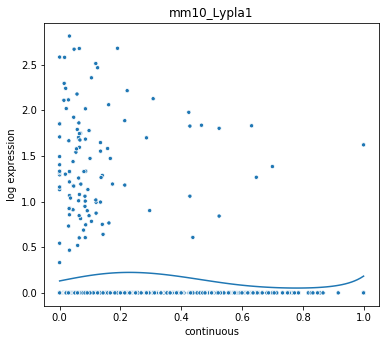

In [5]:
# plot_genes does not give me the desired plot
det.plot_genes(
    genes= adata_new.var_names[:1] ,#      adata_macrophage.var_names[:3],
    log=True
)